# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis
Anggota:
1. Primanda Adyatma Hafiz - 13520022
2. Hansel Valentino Tanoto - 13520046


In [1]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import math

## Read File

In [2]:
# set kolom 
columns_name = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# read file
water_potability = pd.read_csv('water_potability.csv', header=None, names=columns_name)
water_potability.index.name = 'id'

# display data
water_potability

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
id,,,,,,,,,,
1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


## Info Atribut

In [3]:
water_potability.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 1 to 2010
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               2010 non-null   float64
 1   Hardness         2010 non-null   float64
 2   Solids           2010 non-null   float64
 3   Chloramines      2010 non-null   float64
 4   Sulfate          2010 non-null   float64
 5   Conductivity     2010 non-null   float64
 6   OrganicCarbon    2010 non-null   float64
 7   Trihalomethanes  2010 non-null   float64
 8   Turbidity        2010 non-null   float64
 9   Potability       2010 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.7 KB


## Soal 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
maksimum, kuartil, IQR, skewness dan kurtosis.

##### a. Mean, Standar Deviasi, Nilai Minimum, Quartile, Nilai Maksimum, Median, Variance, Range, IQR, Skewness, dan Kurtosis

In [4]:
desc = water_potability.describe()

# Median
desc.loc['median'] = water_potability.median()

# Variance
desc.loc['variance'] = water_potability.var()

# Range
desc.loc['range'] = water_potability.max()-water_potability.min()

# Interquartile Range
desc.loc['IQR'] = water_potability.quantile(0.75) - water_potability.quantile(0.25)

# Skewness
desc.loc['skewness'] = water_potability.skew()

# Kurtosis
desc.loc['kurtosis'] = water_potability.kurtosis()

desc

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.000000,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,7.087193,195.969209,2.190467e+04,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,1.572803,32.643166,8.625398e+03,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,0.227499,73.492234,3.209426e+02,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.090785,176.740657,1.561441e+04,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,8.053006,216.447589,2.717053e+04,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,14.000000,317.338124,5.648867e+04,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000
median,7.029490,197.203525,2.092688e+04,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
variance,2.473709,1065.576277,7.439749e+07,2.512904,1698.355672,6512.792113,11.060746,258.602066,0.609135,0.240708


##### b. Modus

In [5]:
# Modus
Modus = water_potability.mode()
Modus

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...
2005,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


- Data atribut non target bersifat unik sehingga setiap data hanya muncul 1 kali. Akibatnya setiap atribut non target merupakan modus. Jadi, masing-masing atribut memiliki modus sebanyak jumlah data, yaitu 2010 buah.
- Data atribut target (Potability) hanya terdiri dari nilai 0 atau 1. Mayoritas data target bernilai 0 sehingga modusnya adalah 0.

## Soal 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

##### a. Atribut pH

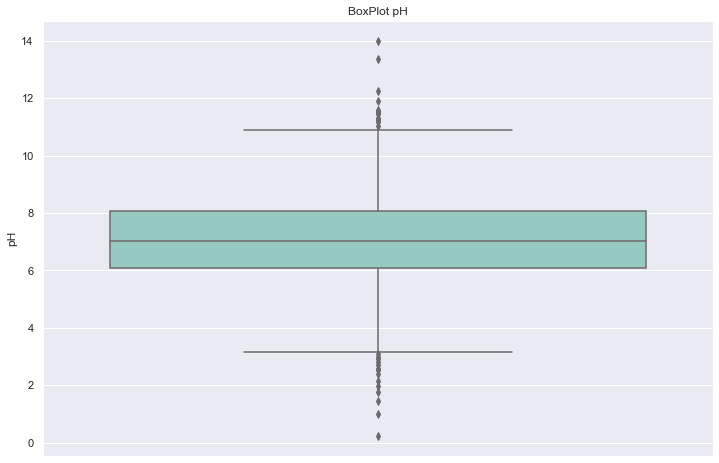

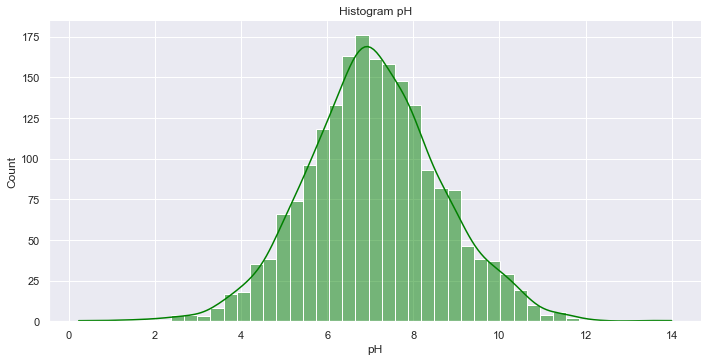

Skewness = 0.04853451405270669
Kurtosis = 0.6269041256617065


In [6]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12, 8)})
# Keseluruhan Data
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set3').set(title = 'BoxPlot pH')
plt.show()
sns.displot(x = 'pH', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram pH')
plt.show()
print("Skewness =", water_potability['pH'].skew())
print("Kurtosis =", water_potability['pH'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data pH termasuk distribusi yang uniform karena memiliki median dan mean yang hampir sama. Hal ini dapat dilihat pada bentuk boxplot dan histogram yang cukup simetris. Kecondongan distribusi data ke arah kiri ini sesuai dengan nilai skewness-nya yang lebih besar dari 0 meskipun tidak signifikan (masih mendekati nol).
- Berdasarkan boxplot, dapat dilihat data pH memiliki pencilan (outlier) yang cukup banyak. Hal ini sesuai dengan nilai kurtosis pH yang lebih besar dari 0 (leptokurtic) yang menandakan data lebih terkonsentrasi di area tengah sehingga terdapat banyak pencilan di bagian ekor (tail) kanan dan kiri.

##### b. Atribut Hardness

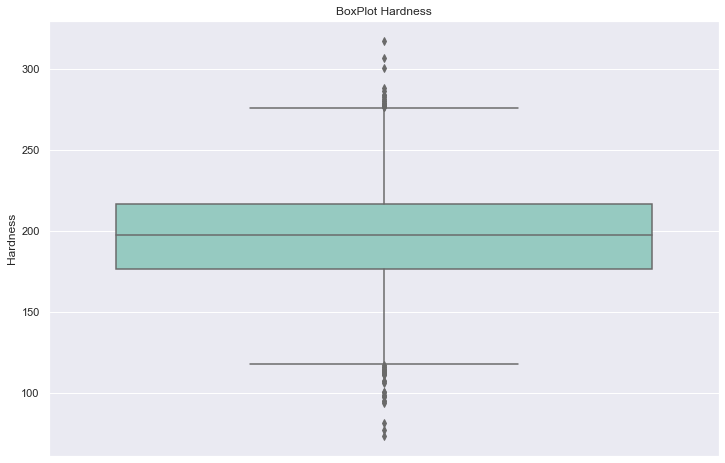

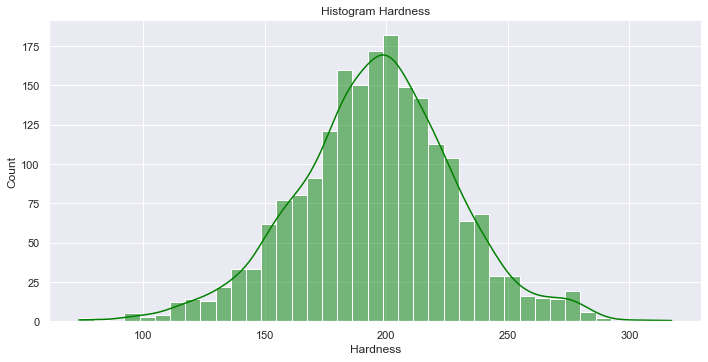

Skewness = -0.08532104172868622
Kurtosis = 0.5254804942991402


In [7]:
# Keseluruhan Data
sns.boxplot(y = 'Hardness', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Hardness')
plt.show()
sns.displot(x = 'Hardness', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Hardness')
plt.show()
print("Skewness =", water_potability['Hardness'].skew())
print("Kurtosis =", water_potability['Hardness'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Hardness masih bisa dikatakan berdistribusi uniform karena memiliki median dan mean yang hampir sama, yaitu di tengah. Hal ini dapat dilihat pada bentuk boxplot dan histogram yang cukup simetris meskipun masih agak condong ke kanan karena nilai skewness-nya yang negatif. 
- Berdasarkan boxplot, dapat dilihat data Hardness juga memiliki pencilan (outlier) yang cukup banyak. Hal ini sesuai dengan nilai kurtosis yang lebih besar dari 0 (leptokurtic) yang artinya data lebih terkonsentrasi di area sekitar mean (tengah) sehingga terdapat banyak data yang dikategorikan sebagai pencilan di bagian ekor (tail) kanan dan kiri.

##### c. Atribut Solids

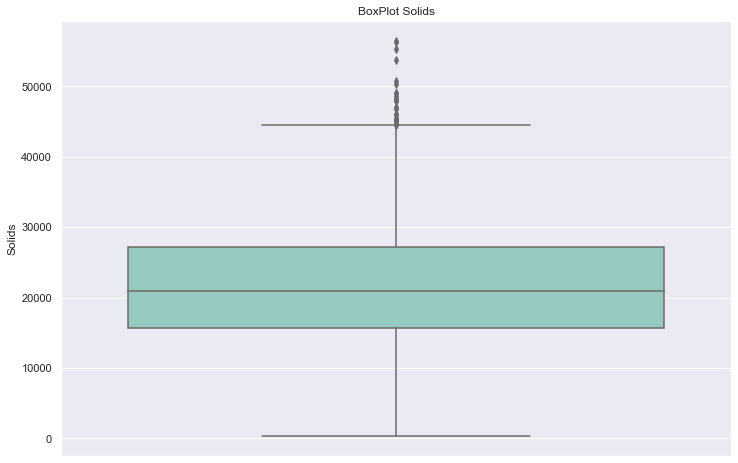

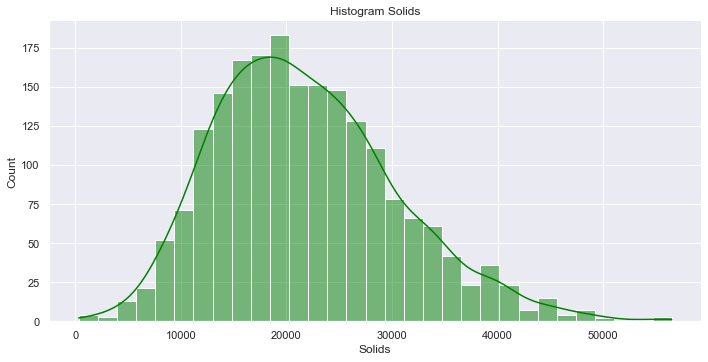

Skewness = 0.5910113724580447
Kurtosis = 0.33732026745944976


In [8]:
# Keseluruhan Data
sns.boxplot(y = 'Solids', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Solids')
plt.show()
sns.displot(x = 'Solids', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Solids')
plt.show()
print("Skewness =", water_potability['Solids'].skew())
print("Kurtosis =", water_potability['Solids'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Solids tidak termasuk distribusi yang uniform karena memiliki memiliki nilai median yang lebh kecil dari mean. Hal ini dapat dilihat pada bentuk boxplot dan histogram yang lebih condong ke nilai kecil sesuai nilai skewnessnya yang positif. Artinya distribusi data Solids lebih terkonsentrasi pada data bernilai rendah (sekitar 10000-30000) atau ekor bagian kiri pada histogram.
- Berdasarkan boxplot, dapat dilihat data Solids memiliki pencilan (outlier) terutama pada data yang bernilai tinggi (kurang lebih di atas 45000). Outliers juga dapat dilihat pada histogram di bagian kanan (ada gap di data bernilai sekitar 50000). Hal ini disebabkan nilai kurtosis yang lebih besar dari 0 (leptokurtic) sehingga data lebih terkonsentrasi di area sekitar mean dan data pada bagian ujung pun dikategorikan sebagai pencilan. Namun, nilai kurtosis data Solids lebih rendah dibanding 2 data sebelumnya sehingga nilai pencilannya pun lebih sedikit.

##### d. Atribut Chloramines

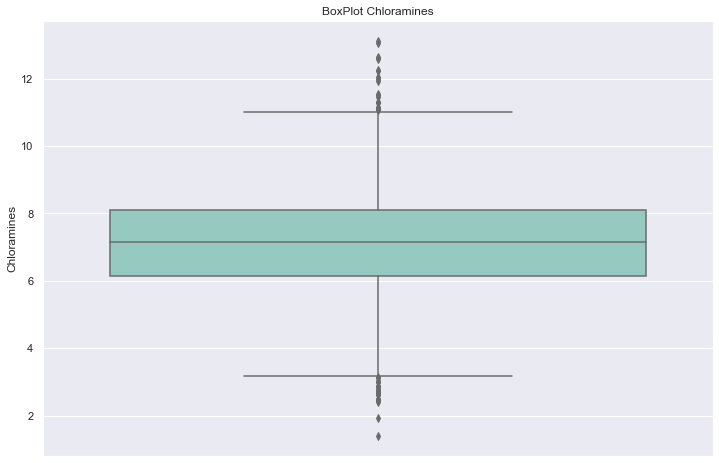

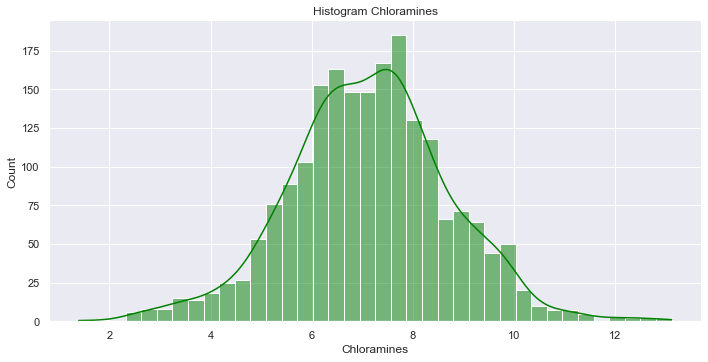

Skewness = 0.013003497779569528
Kurtosis = 0.5497821097667472


In [9]:
# Keseluruhan Data
sns.boxplot(y = 'Chloramines', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Chloramines')
plt.show()
sns.displot(x = 'Chloramines', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Chloramines')
plt.show()
print("Skewness =", water_potability['Chloramines'].skew())
print("Kurtosis =", water_potability['Chloramines'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Chloramines terlihat memiliki persebaran data yang mendekati bentuk kurva yang terdistribusi uniform. Hal ini juga didukung dengan data skewness yang sangat mendekati 0, meskipun masih tergolong positively skewed karena bernilai lebih besar dari 0.
- Berdasarkan boxplot, dapat dilihat data Chloramines juga memiliki pencilan (outlier) yang cukup banyak karena memiliki nilai kurtosis yang lebih besar dari 0 (leptokurtic). Artinya, distribusi data lebih terkonsentrasi di bagian tengah sehingga meninggalkan banyak pencilan di ekor (tail) kanan dan kiri histogram.

##### e. Atribut Sulfate

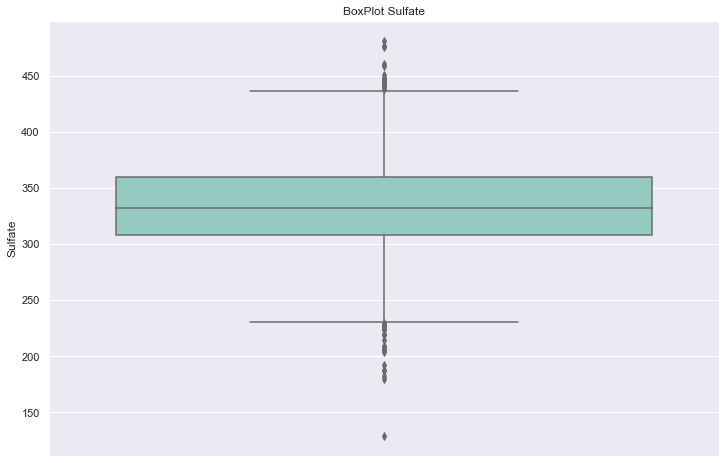

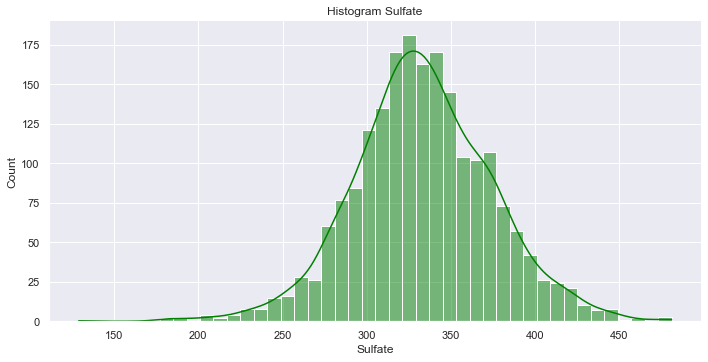

Skewness = -0.04572780443653543
Kurtosis = 0.7868544988131605


In [10]:
# Keseluruhan Data
sns.boxplot(y = 'Sulfate', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Sulfate')
plt.show()
sns.displot(x = 'Sulfate', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Sulfate')
plt.show()
print("Skewness =", water_potability['Sulfate'].skew())
print("Kurtosis =", water_potability['Sulfate'].kurtosis())

- Berdasarkan boxplot dan histogram, data Sulfate tidak termasuk distribusi yang uniform karena memiliki nilai median yang lebih besar dari mean. Hal ini dapat dilihat pada bentuk boxplot dan histogram yang lebih condong ke data bernilai besar (sekitar 275-400) dan juga didukung oleh nilai skewness yang negatif. 
- Berdasarkan boxplot, dapat dilihat data Sulfate memiliki pencilan (outlier) yang cukup banyak yang didominasi data bernilai rendah (sekitar di bawah 230). Hal ini juga dapat dilihat pada histogram di bagian kiri di mana terdapat data yang "terpisah" dari kumpulan data lainnya. Hal ini juga sesuai dengan nilai kurtosis yang lebih besar dari 0 (leptokurtic) dan cukup besar dibanding data-data sebelumnya, artinya distribusi data Sulfate lebih terkonsentrasi pada data sekitar mean sehingga menimbulkan banyak pencilan di bagian kiri dan kanan histogram.

##### f. Atribut Conductivity

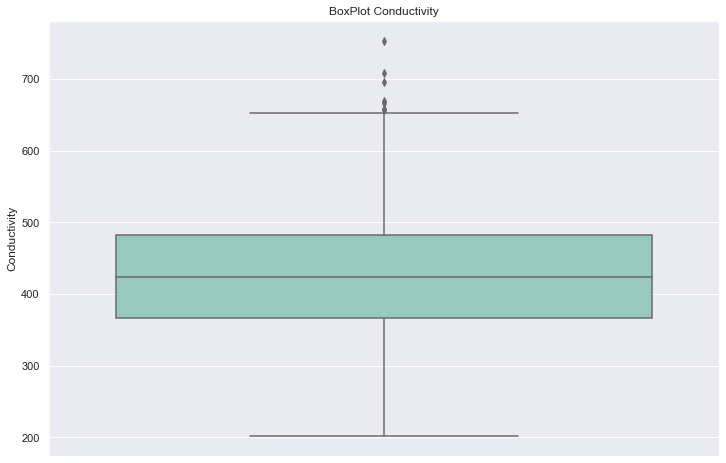

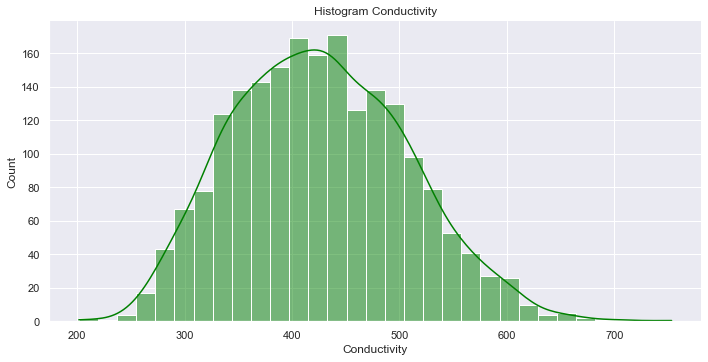

Skewness = 0.26801233302645316
Kurtosis = -0.23720600574806516


In [11]:
# Keseluruhan Data
sns.boxplot(y = 'Conductivity', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Conductivity')
plt.show()
sns.displot(x = 'Conductivity', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Conductivity')
plt.show()
print("Skewness =", water_potability['Conductivity'].skew())
print("Kurtosis =", water_potability['Conductivity'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Conductivity tidak termasuk distribusi yang uniform karena memiliki memiliki nilai median yang lebh kecil dari mean. Hal ini dapat dilihat pada bentuk boxplot dan histogram yang lebih condong ke nilai kecil dan juga nilai skewness yang positif. Artinya distribusi data Solids lebih terkonsentrasi pada data bernilai rendah (sekitar 300-550) atau data bagian kiri pada histogram.
- Berdasarkan boxplot, dapat dilihat data Conductivity memiliki pencilan terutama pada data yang bernilai besar (kurang lebih di atas 650) namun tidak terlalu banyak. Hal ini karena data Conductivity memiliki nilai kurtosis yang lebih kecil dari 0 (playkurtic), artinya data lebih tersebar ke arah ekor kanan dan kiri sehingga frekuensi data pencilan pun menurun. 

##### g. Atribut OrganicCarbon

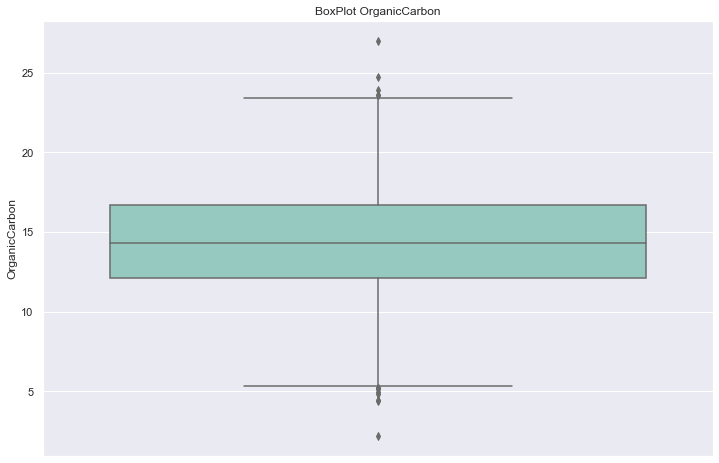

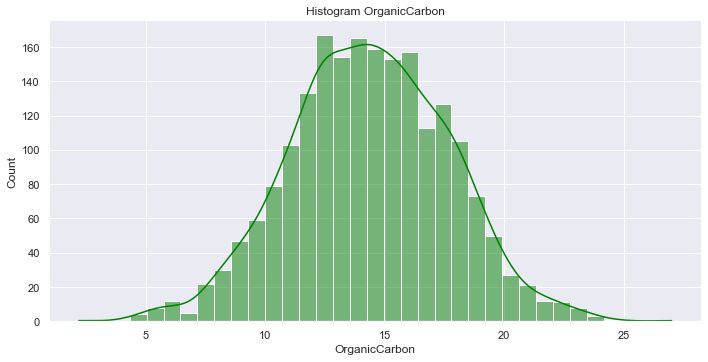

Skewness = -0.02021975629181238
Kurtosis = 0.031018388192253


In [12]:
# Keseluruhan Data
sns.boxplot(y = 'OrganicCarbon', data = water_potability, palette = 'Set3').set(title = 'BoxPlot OrganicCarbon')
plt.show()
sns.displot(x = 'OrganicCarbon', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram OrganicCarbon')
plt.show()
print("Skewness =", water_potability['OrganicCarbon'].skew())
print("Kurtosis =", water_potability['OrganicCarbon'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data OrganicCarbon terlihat memiliki persebaran data yang mendekati kurva distribusi normal, tetapi dapat terlihat kecenderungan data yang condong ke kanan (data bernilai besar). Hal ini juga sesuai dengan nilai skewnness yang negatif (data bersifat negatively skewed). 
- Berdasarkan boxplot, dapat dilihat data OrganicCarbon juga memiliki pencilan (outlier), tetapi terlihat tidak sebanyak atribut lainnya karena nilai kurtosisnya yang juga kecil (mendekati nol), meskipun masih tergolong leptokurtic (data masih lebih terkonsentrasi ke daerah sekitar mean dibanding distribusi normal).

##### h. Atribut Trihalomethanes

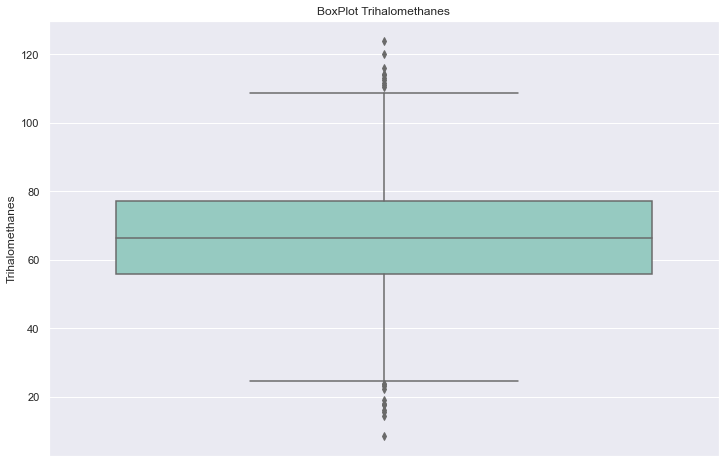

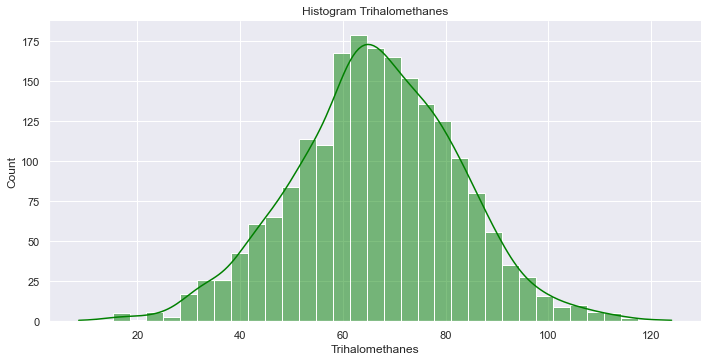

Skewness = -0.05138268451619478
Kurtosis = 0.2230167810639787


In [13]:
# Keseluruhan Data
sns.boxplot(y = 'Trihalomethanes', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Trihalomethanes')
plt.show()
sns.displot(x = 'Trihalomethanes', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Trihalomethanes')
plt.show()
print("Skewness =", water_potability['Trihalomethanes'].skew())
print("Kurtosis =", water_potability['Trihalomethanes'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Trihalomethanes terlihat memiliki persebaran data yang mendekati kurva distribusi normal, tetapi pada bagian tengah, terlihat data lebih condong ke kanan (data bernilai besar), sesuai dengan nilai skewness-nya yang negatif. Kurva data Trihalomethanes juga terlihat lebih lancip pada bagian tengah yang menandakan data lebih terkonsentrasi di sekitar mean dan median.
- Berdasarkan boxplot, dapat dilihat data Trihalomethanes juga memiliki pencilan (outlier) yang cukup banyak karena nilai kurtosisnya yang lebih besar dari nol. Artinya, data tergolong leptokurtic, yaitu distribusi data lebih terkonsentrasi di bagian tengah sehingga meninggalkan banyak pencilan di ekor (tail) kanan dan kiri histogram.

##### i. Atribut Turbidity

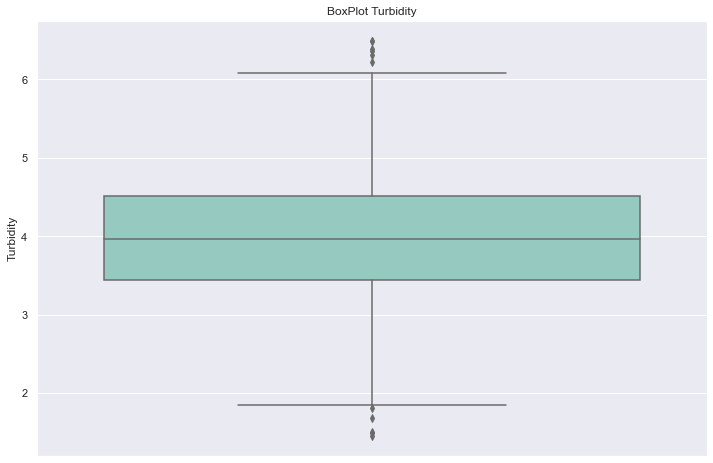

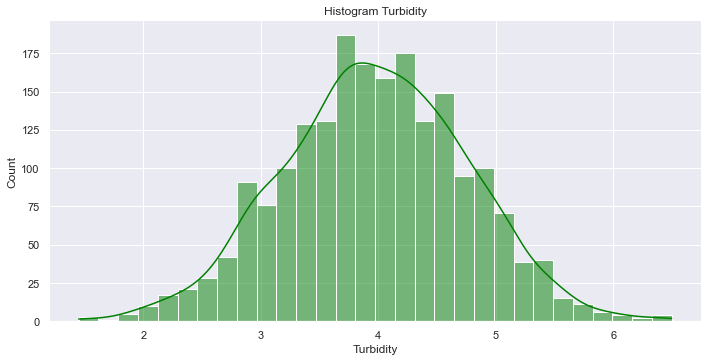

Skewness = -0.03226597968019271
Kurtosis = -0.049830796949249745


In [14]:
# Keseluruhan Data
sns.boxplot(y = 'Turbidity', data = water_potability, palette = 'Set3').set(title = 'BoxPlot Turbidity')
plt.show()
sns.displot(x = 'Turbidity', data = water_potability, kde = True, color = 'Green', height = 5, aspect = 2).set(title = 'Histogram Turbidity')
plt.show()
print("Skewness =", water_potability['Turbidity'].skew())
print("Kurtosis =", water_potability['Turbidity'].kurtosis())

- Berdasarkan boxplot dan histogram, distribusi data Turbidity terlihat memiliki persebaran data yang mendekati kurva distribusi normal, tetapi dapat terlihat distribusi data yang lebih condong ke kanan, sesuai nilai skewness-nya yang negatif. 
- Berdasarkan boxplot, dapat dilihat data Turbidity juga memiliki pencilan (outlier), tetapi juga terlihat tidak terlalu banyak karena nilai kurtosisnya yang lebih kecil dari 0. Artinya distribusi data tergolong playkurtic, yaitu data lebih tersebar ke arah ekor kanan dan kiri sehingga frekuensi data pencilan pun menurun.

## Soal 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak

Metode yang digunakan yakni dengan melihat kelancipan dari histogram (kurtosis) serta kesimetrian dari histogram (skewness). Sebuah data dikatakan berdistribusi normal bila distribusi nilainya tidak membentuk histogram yang terlalu landai ataupun terlalu lancip serta histogram juga simetri pada titik mean, median, dan modus

##### a. Atribut pH

Berdasarkan distribusi data atribut pH dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### b. Atribut Hardness

Berdasarkan distribusi data atribut Hardness dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### c. Atribut Solids

Berdasarkan distribusi data atribut Solids dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih besar. Selain itu, kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### d. Atribut Chloramines

Berdasarkan distribusi data atribut Chloramines dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### e. Atribut Sulfate

Berdasarkan distribusi data atribut Sulfate dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih besar dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Selain itu, kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### f. Atribut Conductivity

Berdasarkan distribusi data atribut Conductivity dari histogram diperoleh kurva yang tidak simetri karena kurva memiliki modus yang lebih kecil dibandingkan mean sehingga kurva cenderung landai untuk x yang lebih kecil. Akan tetapi, kurva tidak terlalu lancip serta tidak terlalu landai. Oleh karena itu kurva tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### g. Atribut OrganicCarbon

Berdasarkan distribusi data atribut OrganicCarbon dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang sedikit lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### h. Atribut Trihalomethanes

Berdasarkan distribusi data atribut Trihalomethanes dari histogram diperoleh kurva yang simetri, namun kurva memiliki bentuk yang cenderung lancip sehingga tidak dapat diklasifikasikan sebagai kurva berdistribusi normal

##### i. Atribut Turbidity

Berdasarkan distribusi data atribut Turbidity dari histogram diperoleh kurva yang simetri, selain itu kurva tidak terlalu lancip maupun terlalu landai sehingga kurva dapat diklasifikasikan sebagai kurva yang berdistribusi normal

## Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [15]:
comparison_symbol = ['<', '≠', '>']



def uji_hipotesis_mean(case, atribut, x_bar, mu_0, sigma, n, alpha):
# Uji hipotesis mean satu sampel jika nilai standar deviasi diketahui
    symbol = comparison_symbol[case]
    print("Uji Hipotesis (mean):")
    
    # LANGKAH 1
    print("1. Hipotesis nol\n   H₀: μ = {}".format(mu_0))
    
    # LANGKAH 2
    print("2. Hipotesis alternatif\n   H₁: μ {} {} ({}-tailed test)".format(symbol, mu_0, "Two" if case == 1 else "One"))
    
    # LANGKAH 3
    print("3. Tingkat signifikan\n   α = {}".format(alpha))
    
    # LANGKAH 4
    print("4. Uji statistik menggunakan distribusi normal")
    print("   Daerah kritis adalah ", end="")
    z_0 = st.norm.ppf((1 - alpha / 2) if case == 1 else (1 - alpha))
    # H₁ < μ₀
    if (case == 0):
        print("z < -Zα = {:.3f}".format(-z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))
    # H₁ ≠ μ₀
    elif (case == 1):
        print("z < -Z½α = {:.3f} atau z > Z½α = {:.3f}".format(-z_0, z_0))
        print("   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = {}".format(1 - alpha/2))
    # H₁ > μ₀
    else:
        print("z > Zα = {:.3f}".format(z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))

    # LANGKAH 5
    print("5. Perhitungan nilai uji statistik dan P-Value")
    print("   z = (x̄ - μ₀) / (σ / √n)")
    print("   z = ({} - {}) / ({} / √{})".format(x_bar, mu_0, sigma, n))
    z = (x_bar - mu_0) / (sigma / np.sqrt(n))
    print("   z = {:.3f}".format(z))
    # H₁ < μ₀
    if (case == 0):
        p_value = st.norm.cdf(z)
        print("   P-Value = P(Z < {:.3f}) = {:.4f}".format(z, p_value))
    # H₁ ≠ μ₀
    elif (case == 1):
        p_value = (2 * st.norm.cdf(z)) if z < 0 else (2 * st.norm.sf(z))
        print("   P-Value = 2 × P(Z {} {:.3f}) = {:.4f}".format("<" if z < 0 else ">", z, p_value))
    # H₁ > μ₀
    else:
        p_value = st.norm.sf(z)
        print("   P-Value = P(Z > {:.3f}) = {:.4f}".format(z, p_value))

    # LANGKAH 6
    print("6. Kesimpulan")
    # tidak menolak
    if (p_value > alpha):
        print("   Tidak menolak H₀ karena z berada di luar daerah kritis dan nilai P > α") 
        print("   sehingga dapat disimpulkan nilai rata-rata {} = {}".format(atribut, mu_0))
    # menolak
    else:
        print("   Tolak H₀ karena z berada di dalam daerah kritis dan nilai P < α") 
        print("   sehingga dapat disimpulkan nilai rata-rata {} {} {}".format(atribut, symbol, mu_0))
    print()



def uji_hipotesis_proporsi(case, atribut, p_0, x, n, alpha):
# Uji hipotesis proporsi satu sampel untuk n besar (distribusi binomial dapat didekati dengan distribusi normal)
    symbol = comparison_symbol[case]
    print("Uji Hipotesis (proportion):")
    
    # LANGKAH 1
    print("1. Hipotesis nol\n   H₀: p = {}".format(p_0))
    
    # LANGKAH 2
    print("2. Hipotesis alternatif\n   H₁: p {} {} ({}-tailed test)".format(symbol, p_0, "Two" if case == 1 else "One"))
    
    # LANGKAH 3
    print("3. Tingkat signifikan\n   α = {}".format(alpha))
    
    # LANGKAH 4
    print("4. Uji statistik menggunakan distribusi binomial dengan p = {} dan n = {}.".format(p_0, n))
    p_hat = x / n
    print("   Karena n cukup besar, perhitungan dapat didekati menggunakan distribusi normal dengan p̂ = x / n = {}".format(p_hat))
    print("   Daerah kritis adalah ", end="")
    z_0 = st.norm.ppf((1 - alpha / 2) if case == 1 else (1 - alpha))
    # H₁ < μ₀
    if (case == 0):
        print("z < -Zα = {:.3f}".format(-z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))
    # H₁ ≠ μ₀
    elif (case == 1):
        print("z < -Z½α = {:.3f} atau z > Z½α = {:.3f}".format(-z_0, z_0))
        print("   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = {}".format(1 - alpha/2))
    # H₁ > μ₀
    else:
        print("z > Zα = {:.3f}".format(z_0))
        print("   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(1 - alpha))

    # LANGKAH 5
    print("5. Perhitungan nilai uji statistik dan P-Value")
    print("   z = (p̂ - p₀) / √(p₀ q₀/n)")
    print("   z = ({} - {}) / √(({}) ({}) / {})".format(p_hat, p_0, p_0, (1 - p_0), n))
    z = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)
    print("   z = {:.3f}".format(z))
    # H₁ < μ₀
    if (case == 0):
        p_value = st.norm.cdf(z)
        print("   P-Value = P(Z < {:.3f}) = {:.4f}".format(z, p_value))
    # H₁ ≠ μ₀
    elif (case == 1):
        p_value = (2 * st.norm.cdf(z)) if z < 0 else (2 * st.norm.sf(z))
        print("   P-Value = 2 × P(Z {} {:.3f}) = {:.4f}".format("<" if z < 0 else ">", z, p_value))
    # H₁ > μ₀
    else:
        p_value = st.norm.sf(z)
        print("   P-Value = P(Z > {:.3f}) = {:.4f}".format(z, p_value))

    # LANGKAH 6
    print("6. Kesimpulan")
    # tidak menolak
    if (p_value > alpha):
        print("   Tidak menolak H₀ karena z berada di luar daerah kritis dan nilai P > α") 
        print("   sehingga dapat disimpulkan proporsi nilai {} = {}".format(atribut, p_0))
    # menolak
    else:
        print("   Tolak H₀ karena z berada di dalam daerah kritis dan nilai P < α") 
        print("   sehingga dapat disimpulkan proporsi nilai {} {} {}".format(atribut, symbol, p_0))
    print()

##### a. Nilai Rata-rata pH di atas 7?

Diketahui:
  x̄ = 7.0871927687138285
  σ = 1.5728029470456655
  n = 2010
  μ₀ = 7

Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 7
2. Hipotesis alternatif
   H₁: μ > 7 (One-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z > Zα = 1.645
   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ / √n)
   z = (7.0871927687138285 - 7) / (1.5728029470456655 / √2010)
   z = 2.485
   P-Value = P(Z > 2.485) = 0.0065
6. Kesimpulan
   Tolak H₀ karena z berada di dalam daerah kritis dan nilai P < α
   sehingga dapat disimpulkan nilai rata-rata pH > 7

Boxplot:


Text(0.5, 1.0, 'Boxplot pH')

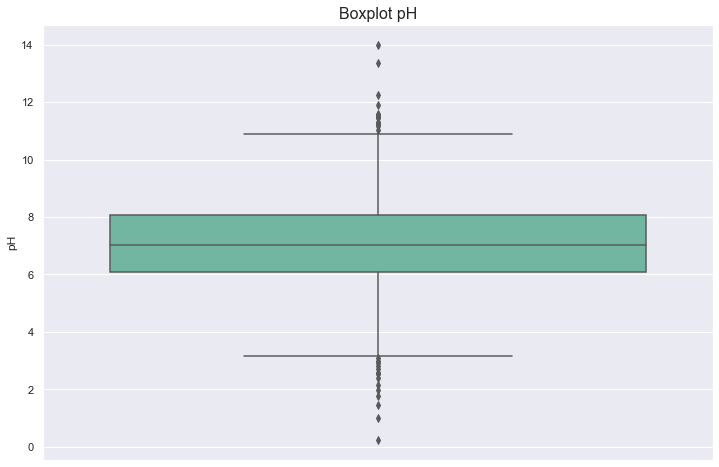

In [16]:
# Variabel
mu_0 = 7
alpha = 0.05
x_bar = water_potability['pH'].mean()
sigma = water_potability['pH'].std()
n = len(water_potability)
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}\n".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(2, "pH", x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'pH', data = water_potability, palette = 'Set2')
plt.title("Boxplot pH", size = 16)

##### b. Nilai Rata-rata Hardness tidak sama dengan 205?

Diketahui:
  x̄ = 195.96920903783524
  σ = 32.643165859429864
  n = 2010
  μ₀ = 205
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 205
2. Hipotesis alternatif
   H₁: μ ≠ 205 (Two-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z < -Z½α = -1.960 atau z > Z½α = 1.960
   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = 0.975
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ / √n)
   z = (195.96920903783524 - 205) / (32.643165859429864 / √2010)
   z = -12.403
   P-Value = 2 × P(Z < -12.403) = 0.0000
6. Kesimpulan
   Tolak H₀ karena z berada di dalam daerah kritis dan nilai P < α
   sehingga dapat disimpulkan nilai rata-rata Hardness ≠ 205

Boxplot:


Text(0.5, 1.0, 'Boxplot Hardness')

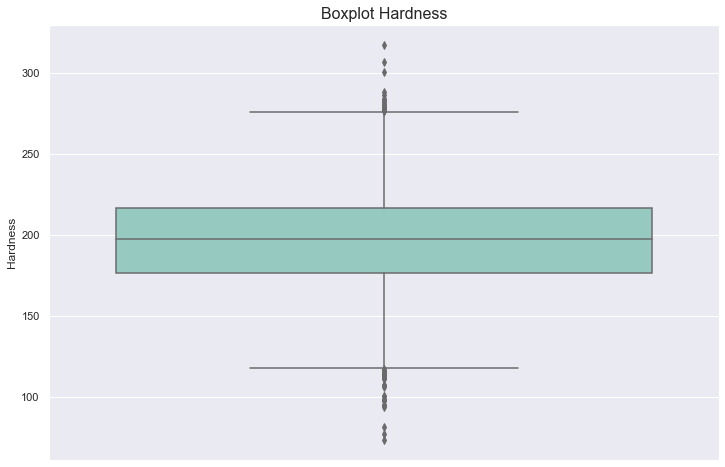

In [17]:
# Variabel
mu_0 = 205
alpha = 0.05
x_bar = water_potability['Hardness'].mean()
sigma = water_potability['Hardness'].std()
n = len(water_potability)
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(1, "Hardness", x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Hardness', data = water_potability, palette = 'Set3')
plt.title("Boxplot Hardness", size = 16)

##### c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

Diketahui:
  x̄ = 22347.334446383426
  σ = 7935.967706199006
  n = 100
  μ₀ = 21900
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ = 21900
2. Hipotesis alternatif
   H₁: μ ≠ 21900 (Two-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi normal
   Daerah kritis adalah z < -Z½α = -1.960 atau z > Z½α = 1.960
   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = 0.975
5. Perhitungan nilai uji statistik dan P-Value
   z = (x̄ - μ₀) / (σ / √n)
   z = (22347.334446383426 - 21900) / (7935.967706199006 / √100)
   z = 0.564
   P-Value = 2 × P(Z > 0.564) = 0.5730
6. Kesimpulan
   Tidak menolak H₀ karena z berada di luar daerah kritis dan nilai P > α
   sehingga dapat disimpulkan nilai rata-rata 100 baris pertama kolom Solids = 21900

Boxplot:


Text(0.5, 1.0, 'Boxplot Solids')

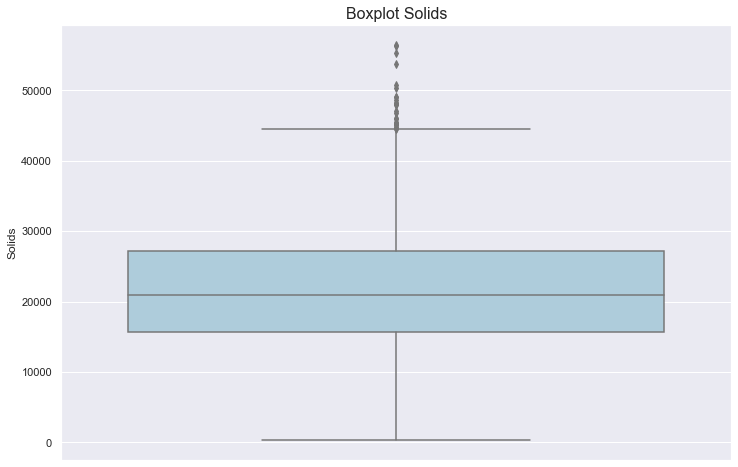

In [18]:
# Variabel
mu_0 = 21900
alpha = 0.05
x_bar = water_potability.head(100)['Solids'].mean()
sigma = water_potability.head(100)['Solids'].std()
n = 100
print("Diketahui:\n  x̄ = {}\n  σ = {}\n  n = {}\n  μ₀ = {}".format(x_bar, sigma, n, mu_0))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_mean(1, "100 baris pertama kolom Solids", x_bar, mu_0, sigma, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Solids', data = water_potability, palette = 'Paired')
plt.title("Boxplot Solids", size = 16)

##### d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

Diketahui:
  p₀ = 0.1
  x = 745
  n = 2010
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (proportion):
1. Hipotesis nol
   H₀: p = 0.1
2. Hipotesis alternatif
   H₁: p ≠ 0.1 (Two-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi binomial dengan p = 0.1 dan n = 2010.
   Karena n cukup besar, perhitungan dapat didekati menggunakan distribusi normal dengan p̂ = x / n = 0.3706467661691542
   Daerah kritis adalah z < -Z½α = -1.960 atau z > Z½α = 1.960
   Nilai Z½α adalah nilai z yang memenuhi P(Z < z) = 1 - ½α = 0.975
5. Perhitungan nilai uji statistik dan P-Value
   z = (p̂ - p₀) / √(p₀ q₀/n)
   z = (0.3706467661691542 - 0.1) / √((0.1) (0.9) / 2010)
   z = 40.446
   P-Value = 2 × P(Z > 40.446) = 0.0000
6. Kesimpulan
   Tolak H₀ karena z berada di dalam daerah kritis dan nilai P < α
   sehingga dapat disimpulkan proporsi nilai Conductivity yang lebih dari 450 ≠ 0.1

Boxplot:


Text(0.5, 1.0, 'Boxplot Conductivity')

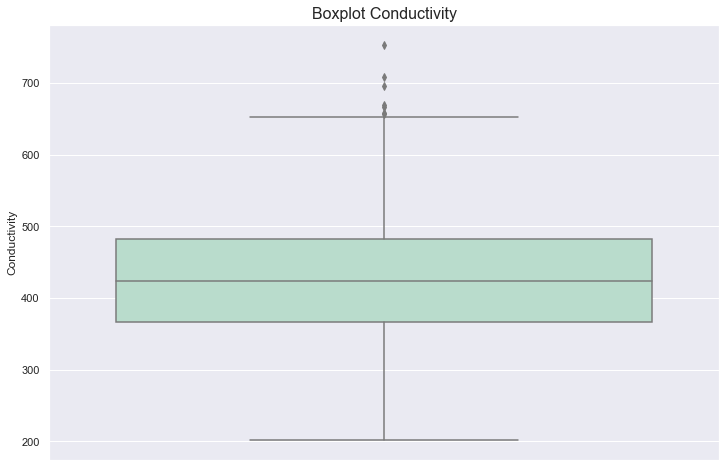

In [19]:
# Variabel
p_0 = 10/100
alpha = 0.05
x = (water_potability['Conductivity'] > 450).sum()
n = len(water_potability)
print("Diketahui:\n  p₀ = {}\n  x = {}\n  n = {}".format(p_0, x, n))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_proporsi(1, "Conductivity yang lebih dari 450", p_0, x, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Conductivity', data = water_potability, palette = 'Pastel2')
plt.title("Boxplot Conductivity", size = 16)

##### e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

Diketahui:
  p₀ = 0.05
  x = 106
  n = 2010
Asumsi: Tingkat kepercayaan adalah 95% sehingga α = 0.05

Uji Hipotesis (proportion):
1. Hipotesis nol
   H₀: p = 0.05
2. Hipotesis alternatif
   H₁: p < 0.05 (One-tailed test)
3. Tingkat signifikan
   α = 0.05
4. Uji statistik menggunakan distribusi binomial dengan p = 0.05 dan n = 2010.
   Karena n cukup besar, perhitungan dapat didekati menggunakan distribusi normal dengan p̂ = x / n = 0.0527363184079602
   Daerah kritis adalah z < -Zα = -1.645
   Nilai Zα adalah nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan nilai uji statistik dan P-Value
   z = (p̂ - p₀) / √(p₀ q₀/n)
   z = (0.0527363184079602 - 0.05) / √((0.05) (0.95) / 2010)
   z = 0.563
   P-Value = P(Z < 0.563) = 0.7132
6. Kesimpulan
   Tidak menolak H₀ karena z berada di luar daerah kritis dan nilai P > α
   sehingga dapat disimpulkan proporsi nilai Trihalomethanes yang kurang dari 40 = 0.05

Boxplot:


Text(0.5, 1.0, 'Boxplot Trihalomethanes')

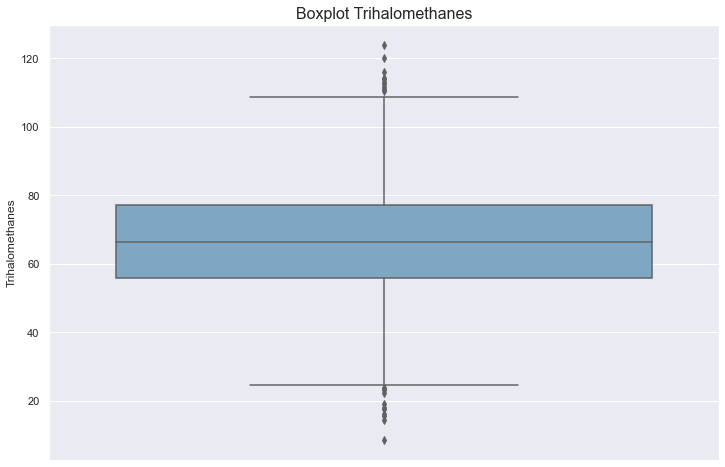

In [20]:
# Variabel
p_0 = 5/100
alpha = 0.05
x = (water_potability['Trihalomethanes'] < 40).sum()
n = len(water_potability)
print("Diketahui:\n  p₀ = {}\n  x = {}\n  n = {}".format(p_0, x, n))
print("Asumsi: Tingkat kepercayaan adalah 95% sehingga α = {}\n".format(alpha))

# Uji Hipotesis
uji_hipotesis_proporsi(0, "Trihalomethanes yang kurang dari 40", p_0, x, n, alpha)

# Visualisasi Boxplot
print("Boxplot:")
sns.boxplot(y = 'Trihalomethanes', data = water_potability, palette = 'PuBu')
plt.title("Boxplot Trihalomethanes", size = 16)

## Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

##### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Diketahui:
  x̄₁ = 331.30532950549565
  x̄₂ = 335.11742332488245
  σ₁ = 41.332754590968776
  σ₂ = 41.02112948764952
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = 0.025 atau P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((331.30532950549565 - 335.11742332488245) - 0) / (√(41.332754590968776²/1005 + 41.02112948764952²/1005)
   z = -0.074
   P = 0.4707010325658625
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir sama

Boxplot:


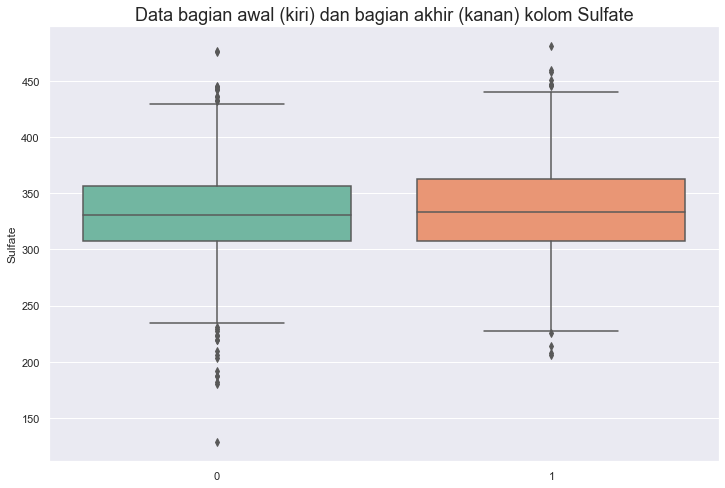

In [21]:
# Split data into two
dataSulfate1=water_potability["Sulfate"][:len(water_potability)//2]
dataSulfate2=water_potability["Sulfate"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataSulfate1.mean()
x_bar_2=dataSulfate2.mean()
sigma_1=dataSulfate1.std()
sigma_2=dataSulfate2.std()
alpha=0.05
n_1=len(dataSulfate1)
n_2=len(dataSulfate2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("Uji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = {} atau P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Sulfate bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot(data = [dataSulfate1, dataSulfate2], palette = 'Set2')
plt.title("Data bagian awal (kiri) dan bagian akhir (kanan) kolom Sulfate", size=18)
plt.ylabel("Sulfate")
plt.show()

##### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Diketahui:
  x̄₁ = 14.253972723723393
  x̄₂ = 14.461907080372756
  σ₁ = 3.3511620707420766
  σ₂ = 3.2985726887318214
  n₁ = 1005
  n₂ = 1005
  d₀ = 0
  α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0.15
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0.15   (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645 , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((14.253972723723393 - 14.461907080372756) - 0) / (√(3.3511620707420766²/1005 + 3.2985726887318214²/1005)
   z = -0.007
   P = 0.4973973874468988
6. Kesimpulan
   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir sama dengan 0.15

Boxplot:


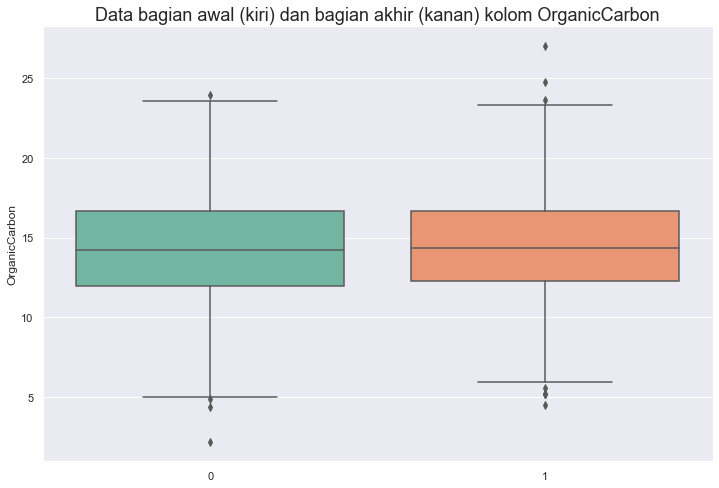

In [22]:
# Split data into two
dataOrganicCarbon1=water_potability["OrganicCarbon"][:len(water_potability)//2]
dataOrganicCarbon2=water_potability["OrganicCarbon"][len(water_potability)//2:len(water_potability)]

d_0=0
x_bar_1=dataOrganicCarbon1.mean()
x_bar_2=dataOrganicCarbon2.mean()
sigma_1=dataOrganicCarbon1.std()
sigma_2=dataOrganicCarbon2.std()
alpha=0.05
n_1=len(dataOrganicCarbon1)
n_2=len(dataOrganicCarbon2)
h_0=0.15
z_0=st.norm.ppf(1 - alpha)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("Uji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {}   (One tailed test)".format(h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = 1 - α = {}".format(z_0,1-alpha))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha):
    print("   Nilai P > 1 - α, maka tolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir lebih dari {}".format(h_0))
else:
    print("   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan selisih nilai rata-rata OrganicCarbon bagian awal dan bagian akhir sama dengan {}".format(h_0))

print("\nBoxplot:")

sns.boxplot(data = [dataOrganicCarbon1, dataOrganicCarbon2], palette = 'Set2')
plt.title("Data bagian awal (kiri) dan bagian akhir (kanan) kolom OrganicCarbon", size=18)
plt.ylabel("OrganicCarbon")
plt.show()

##### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Diketahui:
  x̄₁ = 7.007771140423921
  x̄₂ = 7.147197636249925
  σ₁ = 1.4808922939392726
  σ₂ = 1.306806325954166
  n₁ = 100
  n₂ = 100
  d₀ = 0
  α = 0.05

Uji Hipotesis (mean):
1. Hipotesis nol
   H₀: μ₁-μ₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 atau μ₁-μ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < -1.960 atau z > 1.960 , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = 0.025 atau P(Z < z) = 1 - α/2 = 0.975
5. Perhitungan p-value
   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)
   z = ((7.007771140423921 - 7.147197636249925) - 0) / (√(1.4808922939392726²/100 + 1.306806325954166²/100)
   z = -0.014
   P = 0.49448535294654233
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir sama

Boxplot:


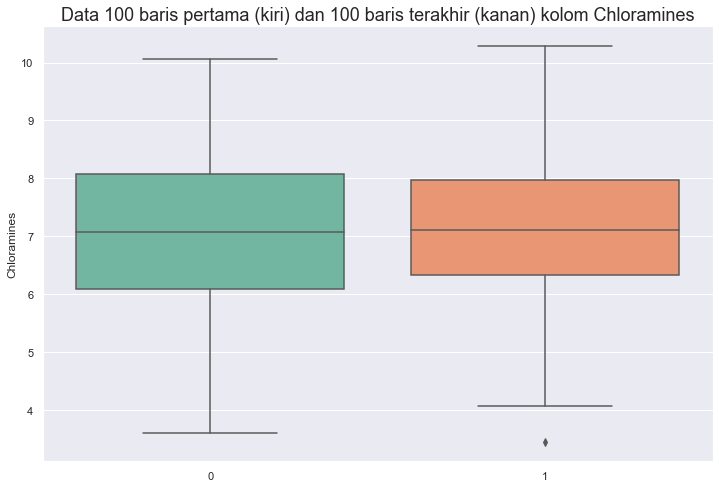

In [23]:
# Split data into two
dataChloramines1=water_potability["Chloramines"][:100]
dataChloramines2=water_potability["Chloramines"][-100:]

d_0=0
x_bar_1=dataChloramines1.mean()
x_bar_2=dataChloramines2.mean()
sigma_1=dataChloramines1.std()
sigma_2=dataChloramines2.std()
alpha=0.05
n_1=len(dataChloramines1)
n_2=len(dataChloramines2)
h_0=0
z_01=st.norm.ppf(alpha/2)
z_02=st.norm.ppf(1 - alpha/2)

print("Diketahui:\n  x̄₁ = {}\n  x̄₂ = {}\n  σ₁ = {}\n  σ₂ = {}\n  n₁ = {}\n  n₂ = {}\n  d₀ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("Uji Hipotesis (mean):")
print("1. Hipotesis nol\n   H₀: μ₁-μ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} atau μ₁-μ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(Z < z) = α/2 = {} atau P(Z < z) = 1 - α/2 = {}".format(z_01,z_02,alpha/2, (1 - alpha/2)))
print("5. Perhitungan p-value")
print("   z = ((x̄₁ - x̄₂) - μ₀) / (√(σ₁²/n₁ + σ₂²/n₂)")
print("   z = (({} - {}) - {}) / (√({}²/{} + {}²/{})".format(x_bar_1,x_bar_2, d_0, sigma_1, n_1,sigma_2,n_2))
z = ((x_bar_1-x_bar_2) - d_0) / math.sqrt(sigma_1**2/n_1+sigma_2**2+n_2)
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai rata-rata Chloramines bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot(data = [dataChloramines1, dataChloramines2], palette = 'Set2')
plt.title("Data 100 baris pertama (kiri) dan 100 baris terakhir (kanan) kolom Chloramines", size=18)
plt.ylabel("Chloramines")
plt.show()

##### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

Diketahui:
  p̂₁ = 0.4835820895522388
  p̂₂ = 0.48656716417910445
  n₁ = 1005
  n₂ = 1005
  α = 0.05
  p = 0.48507462686567165
  q = 0.5149253731343284

Uji Hipotesis (proportion):
1. Hipotesis nol
   H₀: p₁-p₂ = 0
2. Hipotesis alternatif
   H₁: μ₁-μ₂ > 0 (One tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z > 1.645 , diperoleh dari nilai z yang memenuhi dan P(Z < z) = 1 - α = 0.95
5. Perhitungan p-value
   z = (p̂₁ - p̂₂) / (√(pq (1/n₁ + 1/n₂) )
   z = (0.4835820895522388 - 0.48656716417910445) / (√(0.485074626865671650.5149253731343284 (1/1005 + 1/1005) )
   z = -0.134
   P = 0.4467449424088169
6. Kesimpulan
   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di akhir Turbidity

Boxplot:


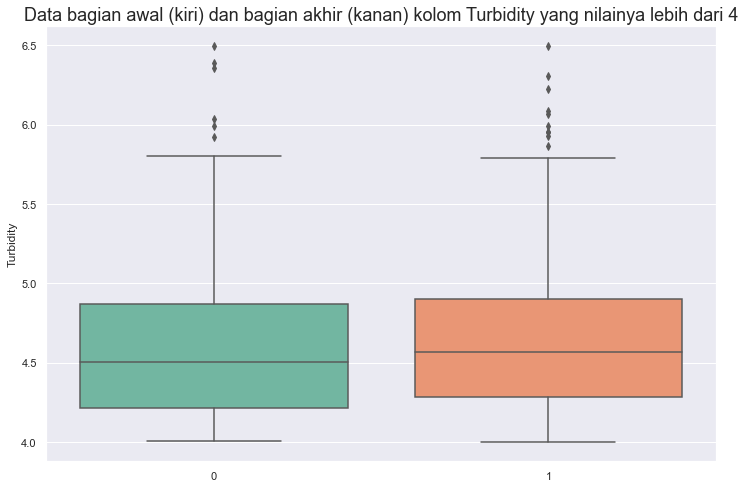

In [24]:
# Split data into two
dataTurbidity1=water_potability["Turbidity"][:len(water_potability)//2]
dataTurbidity1=dataTurbidity1[dataTurbidity1>4]
dataTurbidity2=water_potability["Turbidity"][len(water_potability)//2:len(water_potability)]
dataTurbidity2=dataTurbidity2[dataTurbidity2>4]

alpha=0.05
n_1=len(water_potability)//2
n_2=len(water_potability)-len(water_potability)//2
p_1=len(dataTurbidity1)/n_1
p_2=len(dataTurbidity2)/n_2
h_0=0
z_0=st.norm.ppf(1 - alpha)
p=(p_1*n_1+p_2*n_2)/(n_1+n_2)
q=1-p

print("Diketahui:\n  p̂₁ = {}\n  p̂₂ = {}\n  n₁ = {}\n  n₂ = {}\n  α = {}\n  p = {}\n  q = {}\n".format(p_1,p_2,n_1,n_2,alpha,p,q))
print("Uji Hipotesis (proportion):")
print("1. Hipotesis nol\n   H₀: p₁-p₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: μ₁-μ₂ > {} (One tailed test)".format(h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z > {:.3f} , diperoleh dari nilai z yang memenuhi dan P(Z < z) = 1 - α = {}".format(z_0, (1 - alpha)))
print("5. Perhitungan p-value")
print("   z = (p̂₁ - p̂₂) / (√(pq (1/n₁ + 1/n₂) )")
print("   z = ({} - {}) / (√({}{} (1/{} + 1/{}) )".format(p_1, p_2, p, q, n_1, n_2))
z = (p_1 - p_2) / math.sqrt(p*q*(1/n_1+1/n_2))
print("   z = {:.3f}".format(z))
P = st.norm.cdf(z)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha):
    print("   Nilai P > 1 - α, maka tolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 lebih besar dibandingkan proporsi nilai yang sama di akhir Turbidity")
else:
    print("   Nilai P < 1 - α, maka tidak menolak H₀ dan dapat disimpulkan proporsi Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di akhir Turbidity")

print("\nBoxplot:")

sns.boxplot(data = [dataTurbidity1, dataTurbidity2], palette = 'Set2')
plt.title("Data bagian awal (kiri) dan bagian akhir (kanan) kolom Turbidity yang nilainya lebih dari 4", size=18)
plt.ylabel("Turbidity")
plt.show()

##### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

In [25]:
st.f.ppf(q=0.05,dfn=11,dfd=9)

0.3452773085573657

Diketahui:
  s₁ = 7.007771140423921
  s₂ = 7.147197636249925
  n₁ = 1.4808922939392726
  n₂ = 1.306806325954166
  α = 1005

Uji Hipotesis (variance):
1. Hipotesis nol
   H₀: σ₁-σ₂ = 0
2. Hipotesis alternatif
   H₁: σ₁-σ₂ > 0 atau σ₁-σ₂ < 0  (Two tailed test)
3. Tingkat signifikan
   α = 0.05
4. Daerah kritis
   z < 0.279 atau z > 3.912 , diperoleh dari nilai z yang memenuhi P(F > f) = 1 - α/2 = 0.975 atau P(F > f) = α/2 = 0.025
5. Perhitungan p-value
   f = s₁²/s₂²
   f = 41.332754590968776²/41.02112948764952²
   f = 1.015
   P = 0.8450069272025367
6. Kesimpulan
   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir sama

Boxplot:


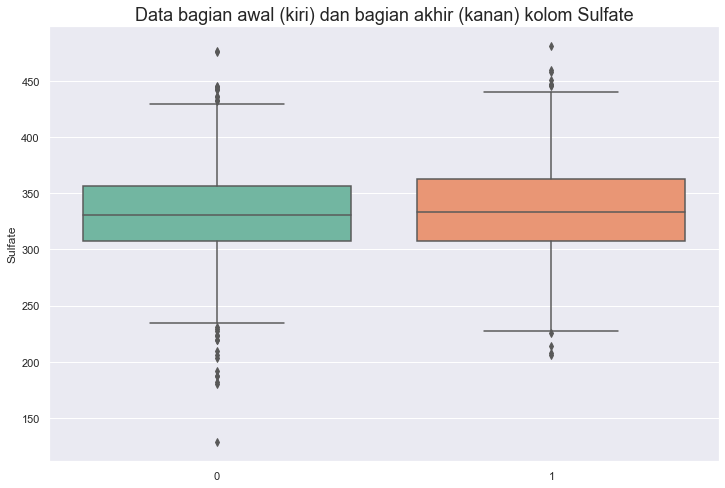

In [26]:
# Split data into two
dataSulfate1=water_potability["Sulfate"][:len(water_potability)//2]
dataSulfate2=water_potability["Sulfate"][len(water_potability)//2:]

s_1=dataSulfate1.std()
s_2=dataSulfate2.std()
alpha=0.05
n_1=len(dataSulfate1)
n_2=len(dataSulfate2)
h_0=0
f_1=st.f.ppf(q=alpha/2,dfn=11,dfd=9)
f_2=st.f.ppf(q=1-alpha/2,dfn=11,dfd=9)

print("Diketahui:\n  s₁ = {}\n  s₂ = {}\n  n₁ = {}\n  n₂ = {}\n  α = {}\n".format(x_bar_1,x_bar_2,sigma_1,sigma_2,n_1,n_2,d_0,alpha))
print("Uji Hipotesis (variance):")
print("1. Hipotesis nol\n   H₀: σ₁-σ₂ = {}".format(h_0))
print("2. Hipotesis alternatif\n   H₁: σ₁-σ₂ > {} atau σ₁-σ₂ < {}  (Two tailed test)".format(h_0,h_0))
print("3. Tingkat signifikan\n   α = {}".format(alpha))
print("4. Daerah kritis\n   z < {:.3f} atau z > {:.3f} , diperoleh dari nilai z yang memenuhi P(F > f) = 1 - α/2 = {} atau P(F > f) = α/2 = {}".format(f_1, f_2, (1 - alpha/2), alpha/2,))
print("5. Perhitungan p-value")
print("   f = s₁²/s₂²")
print("   f = {}²/{}²".format(s_1,s_2))
f = s_1**2/s_2**2
print("   f = {:.3f}".format(f))
P = st.norm.cdf(f)
print("   P = {}".format(P))
print("6. Kesimpulan")
if (P > 1-alpha/2):
    print("   Nilai P > 1 - α/2, maka tolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir berbeda")
elif (P < alpha/2):
    print("   Nilai P < α/2, maka tolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir berbeda")
else:
    print("   Nilai α/2 < P < 1 - α/2, maka tidak menolak H₀ dan dapat disimpulkan nilai variansi Sulfate bagian awal dan bagian akhir sama")

print("\nBoxplot:")

sns.boxplot(data = [dataSulfate1, dataSulfate2], palette = 'Set2')
plt.title("Data bagian awal (kiri) dan bagian akhir (kanan) kolom Sulfate", size=18)
plt.ylabel("Sulfate")
plt.show()

## Soal 6
Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Metode yang digunakan yaitu dengan mengecek koefisien korelasi untuk setiap atribut non-target terhadap atribut target. Jika diperoleh koefisien korelasi lebih dari 0.5 maka akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding lurus. Sedangkan bila diperoleh koefisien korelasi kurang dari -0.5 akan disimpulkan bahwa kedua atribut memiliki korelasi saling berbanding terbalik. Kemudian bila tidak memenuhi dua kasus tersebut makan akan disimpulkan bahwa kedua atribut tidak berkorelasi

##### a. Korelasi pH - Potability

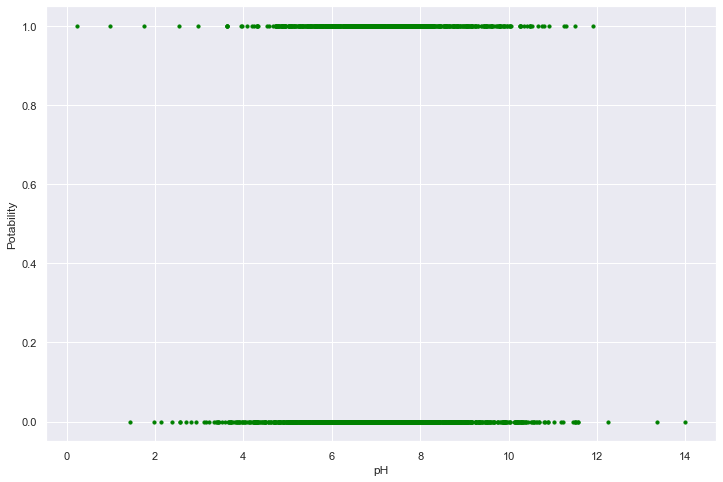

Koefisien korelasi = 0.015475094408433492


In [27]:
water_potability.plot.scatter(x="pH",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["pH"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut pH dan Potability tidak saling berkorelasi 

##### b. Korelasi Hardness - Potability

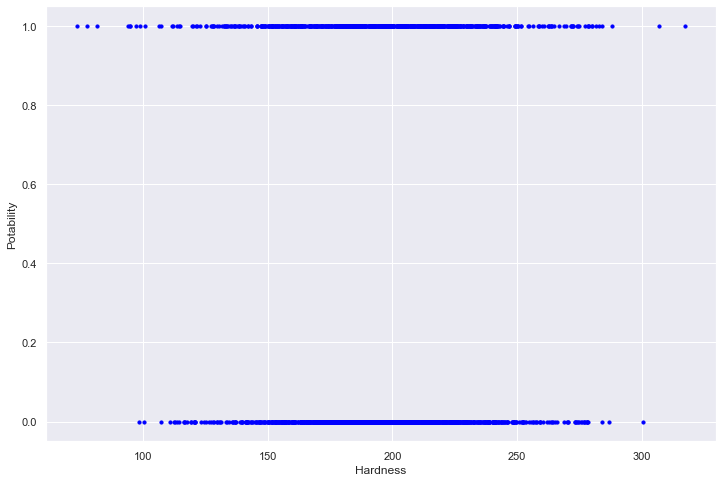

Koefisien korelasi = -0.0014631528959479442


In [28]:
water_potability.plot.scatter(x="Hardness",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Hardness"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Hardness dan Potability tidak saling berkorelasi 

##### c. Korelasi Solids - Potability

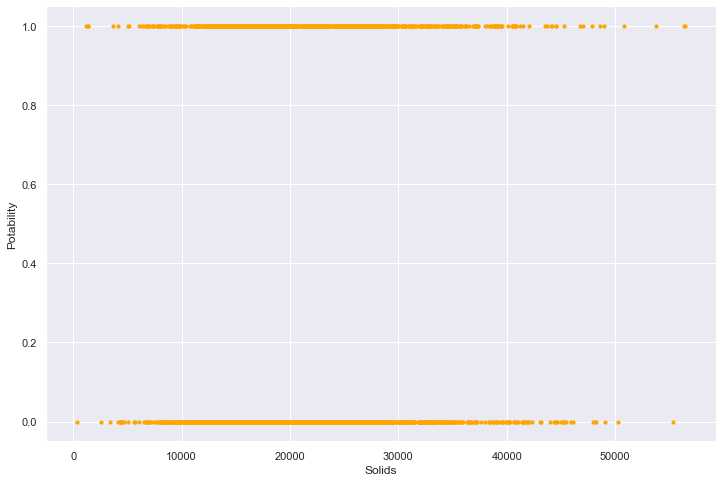

Koefisien korelasi = 0.0389765781817347


In [29]:
water_potability.plot.scatter(x="Solids",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Solids"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Solids dan Potability tidak saling berkorelasi 

##### d. Korelasi Chloramines - Potability

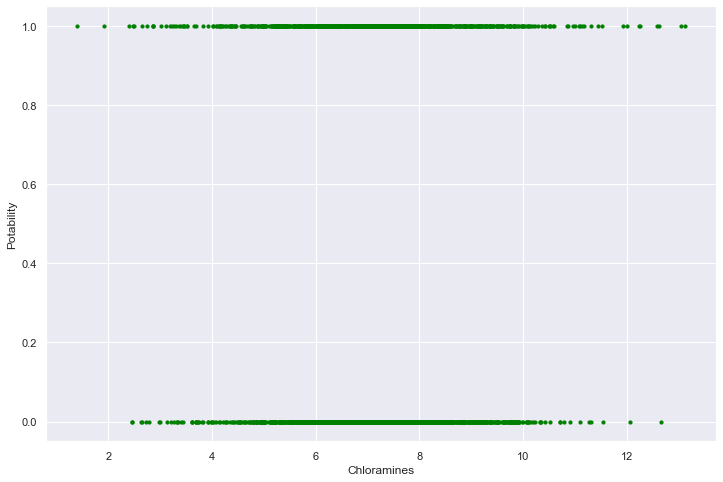

Koefisien korelasi = 0.020778921840524087


In [30]:
water_potability.plot.scatter(x="Chloramines",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["Chloramines"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Chloramines dan Potability tidak saling berkorelasi 

##### e. Korelasi  Sulfate - Potability

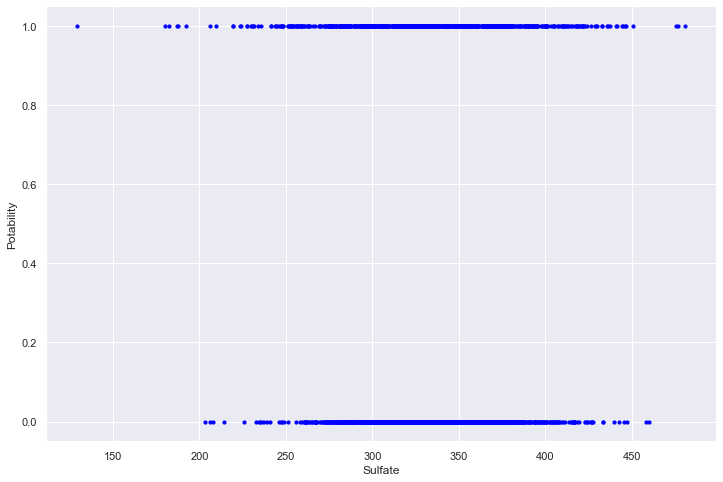

Koefisien korelasi = -0.01570316441927379


In [31]:
water_potability.plot.scatter(x="Sulfate",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Sulfate"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Sulfate dan Potability tidak saling berkorelasi 

##### f. Korelasi  Conductivity - Potability

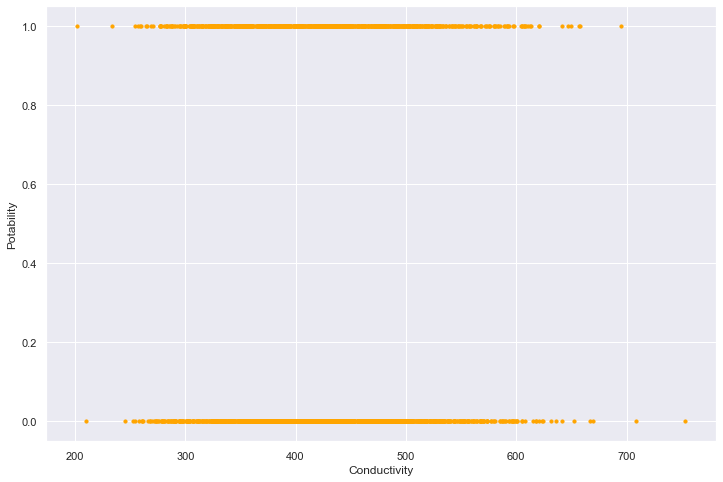

Koefisien korelasi = -0.016257120111377105


In [32]:
water_potability.plot.scatter(x="Conductivity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Conductivity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Conductivity dan Potability tidak saling berkorelasi 

##### g. Korelasi  OrganicCarbon - Potability

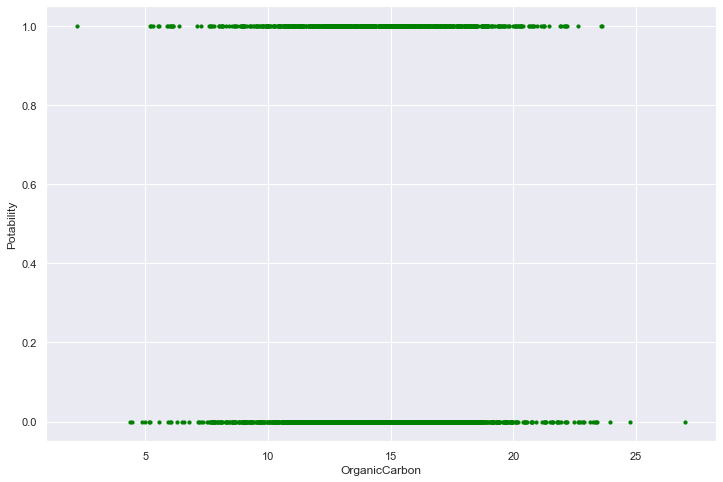

Koefisien korelasi = -0.015488461910747282


In [33]:
water_potability.plot.scatter(x="OrganicCarbon",y="Potability",s=10,c="green")
plt.show()
print("Koefisien korelasi =",water_potability["OrganicCarbon"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut OrganicCarbon dan Potability tidak saling berkorelasi 

##### h. Korelasi  Trihalomethanes - Potability

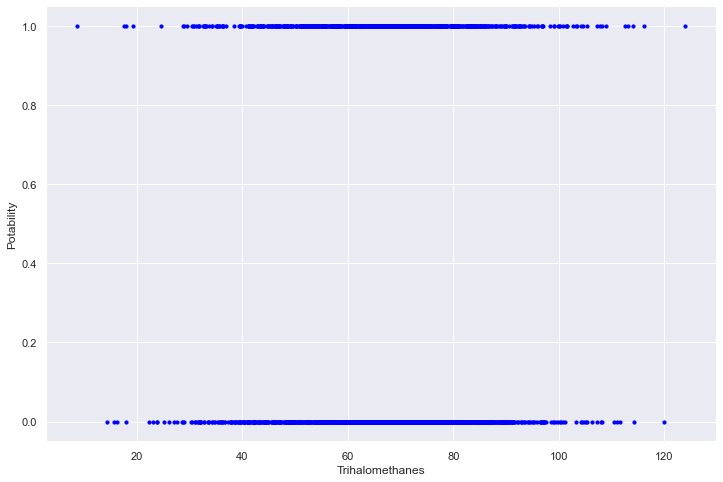

Koefisien korelasi = 0.009236711064713004


In [34]:
water_potability.plot.scatter(x="Trihalomethanes",y="Potability",s=10,c="blue")
plt.show()
print("Koefisien korelasi =",water_potability["Trihalomethanes"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Trihalomethanes dan Potability tidak saling berkorelasi 

##### i. Korelasi  Turbidity - Potability

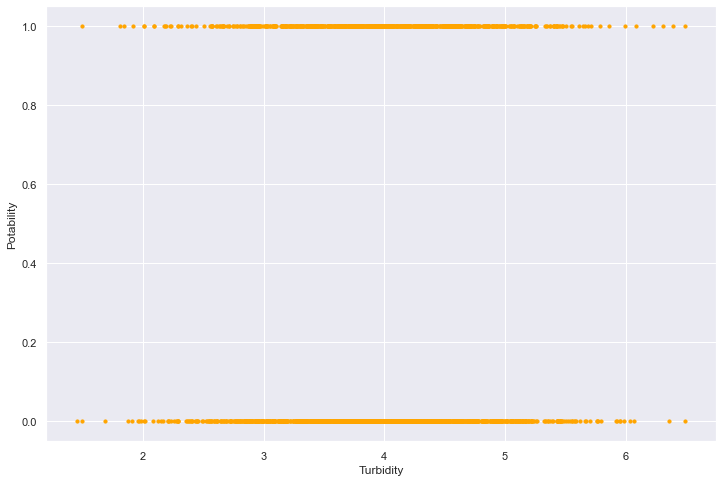

Koefisien korelasi = 0.022331042640622675


In [35]:
water_potability.plot.scatter(x="Turbidity",y="Potability",s=10,c="orange")
plt.show()
print("Koefisien korelasi =",water_potability["Turbidity"].corr(water_potability["Potability"]))

Karena koefisien korelasi mendekati nol serta lebih dari -0.5 dan kurang dari 0.5 maka dapat disimpulkan atribut Turbidity dan Potability tidak saling berkorelasi 